In [1]:
from google.colab import files
  
  
uploaded = files.upload()

Saving all_seasons.csv to all_seasons.csv


In [2]:
from google.colab import files
  
  
uploaded = files.upload()

Saving nba2021_per_game.csv to nba2021_per_game.csv


In [3]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

nba2021_df = pd.read_csv('nba2021_per_game.csv')
nba2021_df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,28,2,14.6,2.6,4.4,0.590,0.0,0.0,0.000,2.6,4.4,0.590,0.590,1.3,2.4,0.561,1.3,2.7,4.0,0.6,0.4,0.5,1.0,1.9,6.5
1,Jaylen Adams,PG,24,MIL,6,0,2.8,0.2,1.3,0.125,0.0,0.3,0.000,0.2,1.0,0.167,0.125,0.0,0.0,0.000,0.0,0.5,0.5,0.3,0.0,0.0,0.0,0.2,0.3
2,Steven Adams,C,27,NOP,27,27,28.1,3.5,5.8,0.603,0.0,0.0,0.000,3.5,5.7,0.606,0.603,1.1,2.3,0.468,4.3,4.6,8.9,2.1,1.0,0.6,1.7,1.9,8.0
3,Bam Adebayo,C,23,MIA,26,26,33.6,7.4,12.9,0.573,0.1,0.2,0.400,7.3,12.7,0.576,0.576,5.1,6.0,0.841,1.9,7.3,9.2,5.3,1.0,1.0,3.0,2.6,19.9
4,LaMarcus Aldridge,C,35,SAS,18,18,26.7,5.9,12.5,0.476,1.3,3.7,0.358,4.6,8.8,0.525,0.529,0.9,1.2,0.762,0.8,3.5,4.3,1.9,0.4,0.9,0.9,1.5,14.1


In [5]:
players = nba2021_df.groupby('Player')

mult_teams = []
for player, player_df in players:
    if len(player_df.index) > 1:
        mult_teams.append(player)

for idx, row in nba2021_df.iterrows():
    if row.Player in mult_teams and row.Tm != 'TOT':
        nba2021_df = nba2021_df.drop([idx])

for player in mult_teams:
    print(player, nba2021_df[nba2021_df.Player == player].shape[0])

In [7]:
URL = 'https://www.basketball-reference.com/awards/hof.html'

req = requests.get(URL)
soup = bs(req.content, 'html.parser')

table = soup.find('table').prettify()
oldnba_df = pd.read_html(table, flavor = 'bs4')[0]

oldnba_df.head()

Unnamed: 0_level_0                              Unnamed: 1_level_0  ... Coaching      
                Year                                            Name  ...        L  W/L%
0               2021                                    Val Ackerman  ...      NaN   NaN
1               2021  Rick Adelman  Player  /  Coach  /  CBB  player  ...      749  .582
2               2021              Chris Bosh  Player  /  CBB  player  ...      NaN   NaN
3               2021                           Bob Dandridge  Player  ...      NaN   NaN
4               2021       Cotton Fitzsimmons  Coach  /  CBB  player  ...      NaN   NaN

[5 rows x 19 columns]

In [8]:
oldnba_df.columns = oldnba_df.columns.droplevel()

for idx, row in oldnba_df.iterrows():
   if row.Category != 'Player':
       oldnba_df = oldnba_df.drop([idx])

def fix_name(name):
    name_list = name.split()
    if len(name_list) == 2:     
        return name
    new_name = ''
    for word in name_list:
        if word == 'Player':
            break
        new_name += word + ' '
    return new_name[:-1]     

oldnba_df['Name'] = oldnba_df['Name'].apply(lambda x: fix_name(x))

oldnba_df = oldnba_df.drop(columns=['Unnamed: 14_level_1', 'G', 'W', 'L', 'W/L%'], axis=1)
oldnba_df = oldnba_df.sort_values(by=['Year'])
oldnba_df = oldnba_df.dropna(subset=['PTS'])

oldnba_df["Year"] = pd.to_numeric(pd.Series(oldnba_df["Year"])) 
oldnba_df["PTS"] = pd.to_numeric(pd.Series(oldnba_df["PTS"])) 
oldnba_df["TRB"] = pd.to_numeric(pd.Series(oldnba_df["TRB"])) 
oldnba_df["AST"] = pd.to_numeric(pd.Series(oldnba_df["AST"])) 
oldnba_df["BLK"] = pd.to_numeric(pd.Series(oldnba_df["BLK"])) 
oldnba_df["STL"] = pd.to_numeric(pd.Series(oldnba_df["STL"])) 

oldnba_df.head()

,Year,Name,Category,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
547,1959,George Mikan,Player,23.1,13.4,2.8,NaN,NaN,.404,NaN,.782,108.7,.249
530,1960,Ed Macauley,Player,17.5,7.5,3.2,NaN,NaN,.436,NaN,.761,100.4,.196
513,1961,Andy Phillip,Player,9.1,4.4,5.4,NaN,NaN,.368,NaN,.695,60.8,.101
458,1970,Bob Davies,Player,14.3,2.9,4.9,NaN,NaN,.378,NaN,.759,49.7,.148
452,1971,Bob Cousy,Player,18.4,5.2,7.5,NaN,NaN,.375,NaN,.803,91.1,.139


(0.0, 31.32)

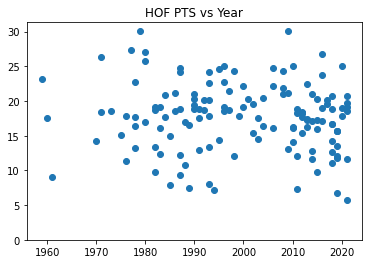

In [9]:
plt.scatter(oldnba_df["Year"], oldnba_df["PTS"])
plt.title("PTS vs Year")
plt.ylim(0)

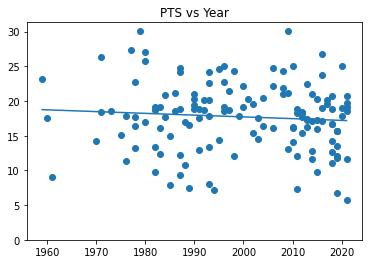

In [12]:
plt.figure()
plt.scatter(oldnba_df["Year"], oldnba_df["PTS"])
plt.title("PTS vs Year")
plt.ylim(0)
m,b = np.polyfit(oldnba_df["Year"], oldnba_df["PTS"], 1)
plt.plot(oldnba_df["Year"], m*oldnba_df["Year"] + b)

In [15]:
curr_points = np.mean(nba2021_df["PTS"])
curr_assists = np.mean(nba2021_df["AST"])
curr_rebounds = np.mean(nba2021_df["TRB"])

In [18]:
oldnba_points = np.mean(oldnba_df["PTS"])
oldnba_assists = np.mean(oldnba_df["AST"])
oldnba_rebounds = np.mean(oldnba_df["TRB"])

Text(0.5, 1.0, 'Rebounds')

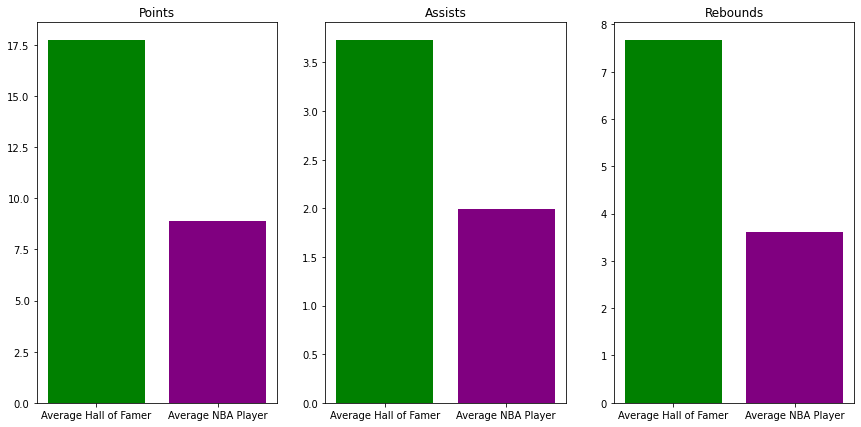

In [22]:
plt.figure(figsize=(25, 7))

colors = ['green', 'purple']

plt.subplot(1, 5,1)
plt.bar(["Average Hall of Famer","Average NBA Player"], [oldnba_points, curr_points],color=colors)
plt.title("Points")

plt.subplot(1, 5,2)
plt.bar(["Average Hall of Famer", "Average NBA Player"], [oldnba_assists, curr_assists],color=colors)
plt.title("Assists")

plt.subplot(1, 5, 3)
plt.bar(["Average Hall of Famer", "Average NBA Player"], [oldnba_rebounds, curr_rebounds],color=colors)
plt.title("Rebounds")


In [23]:
nba_df = pd.read_csv('all_seasons.csv')
nba_df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [24]:
stats = ['gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']

players = nba_df.groupby('player_name')


mult_seasons = []
first_season = {}   

for player, player_df in players:
    if len(player_df.index) > 2:
        mult_seasons.append(player)
    for i, r in player_df.iterrows():
        first_season[player] = r.season
        break

for idx, row in nba_df.iterrows():
    player = row.player_name
    season = row.season
    if player in mult_seasons:
        if first_season[player] == season: 
            player_df = nba_df[nba_df['player_name'] == player]
            n = player_df.shape[0]            
            for stat in stats:
                nba_df.at[idx, stat] = sum(player_df[stat])/n
        else:
            nba_df = nba_df.drop([idx])

nba_df = nba_df.drop(['season'], axis=1)
nba_df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,42,3.825,14.15,2.125,3.575,0.15125,0.33525,0.07925,0.44575,0.0835
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,15,2.300,1.50,0.300,12.300,0.07800,0.15100,0.17500,0.43000,0.0480
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,0.800,1.00,0.400,-2.100,0.10500,0.10200,0.10300,0.37600,0.1480
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,64,3.700,2.30,0.600,-8.700,0.06000,0.14900,0.16700,0.39900,0.0770
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,27,2.400,2.40,0.200,-11.200,0.10900,0.17900,0.12700,0.61100,0.0400


In [31]:
nba_df['hof'] = nba_df['player_name'].apply(lambda x: True if oldnba_df[oldnba_df['Name'] == x].shape[0] > 0 else False)
non_hof_df = nba_df[nba_df['hof'] == False]
non_hof_df = non_hof_df.rename(columns={'player_name': 'Name', 'pts': "PTS", 'reb':"TRB", "ast": "AST"})
non_hof_df.head()

,Unnamed: 0,Name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,PTS,TRB,AST,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,hof
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,15,2.300000,1.5,0.300000,12.300000,0.078,0.151000,0.175,0.430,0.048000,False
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,0.800000,1.0,0.400000,-2.100000,0.105,0.102000,0.103,0.376,0.148000,False
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,64,3.700000,2.3,0.600000,-8.700000,0.060,0.149000,0.167,0.399,0.077000,False
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,27,2.400000,2.4,0.200000,-11.200000,0.109,0.179000,0.127,0.611,0.040000,False
5,5,Eddie Johnson,HOU,38.0,200.66,97.522280,Illinois,USA,1981,2,29,43,6.866667,1.8,0.833333,-6.866667,0.025,0.121333,0.238,0.509,0.089333,False


In [32]:
def get_player_stats_v2(oldnba_df, player_name):
    for i, row in oldnba_df.iterrows():
        if row['Name'] == player_name:
            return [float(row['PTS']), float(row['TRB']), float(row['AST'])]

In [33]:
def hof(player_name, threshold, df):
    playerStats = get_player_stats_v2(df, player_name)
    if playerStats == None:
        return False
    score = 0
    if playerStats[0] > oldnba_points:
        score += 1
    if playerStats[1] > oldnba_rebounds:
        score += 1
    if playerStats[2] > oldnba_assists:
        score += 1
    if score >= threshold:
        return True
    else: 
        return False

In [34]:
def train_model(num_categories, print_hof_results = False, print_non_hof_results = False):
    oldnba_count = 0
    non_hof_names = list(non_hof_df["Name"])
    oldnbaa_names = list(oldnba_df["Name"])

    if print_non_hof_results:
        print("\nnon Hall of Famers:")
    
    for i in range(int(len(non_hof_names)*1)):
        name = non_hof_names[i]
        if hof(name, num_categories, non_hof_df) == True:
            oldnba_count += 1
            if print_non_hof_results:
                print("YES", name)
        else:
            if print_non_hof_results:
                print("NO",name)
    total = len(non_hof_df["Name"])
    accuracy = hof_count/total
    print("Accuracy of classifying non hall of famers:", 100 - (accuracy * 100), "%")
    non_hof_accuracy = 100 - (accuracy * 100)

    oldnba_count = 0
    if print_hof_results:
        print("\nHall of Famers:")

    for i in range(int(len(oldnba_names)*1)):
        name = oldnbaa_names[i]
        if hof(name, num_categories, oldnba_df) == True:
            oldnbaa_count += 1
            if print_hof_results:
                print("YES", name)
        else:
            if print_hof_results:
                print("NO",name)

    total = len(oldnba_df["Name"])
    accuracy = oldnba_count/total
    
    print("Accuracy of classifying hall of famers:", accuracy * 100, "%")
    oldnba_accuracy = accuracy * 100

    return oldnba_accuracy, non_hof_accuracy


In [ ]:
nhf_accuracy = []
hf_accuracy = []
hf, nhf = train_model(2)
nhf_accuracy.append(nhf)
hf_accuracy.append(hf)

In [ ]:
train_model(1, print_hof_results = True)

In [ ]:
current_player_names = list(nba2021_df["Player"])
predicted_hall_of_famers = []
for i in range(int(len(current_player_names)*1)):
        name = current_player_names[i]
        if hof(name, 2, recent_players_df) == True:
            print("YES", name, "is a HOF")
            predicted_hall_of_famers.append(name)